In [1]:
import matplotlib.pyplot as plt
from skimage.filters import try_all_threshold, threshold_mean, threshold_otsu, threshold_triangle
from skimage import data, io, color, filters, morphology
from skimage.morphology import disk, ball
from skimage.util import img_as_ubyte
import numpy as np
from skimage.filters.rank import maximum

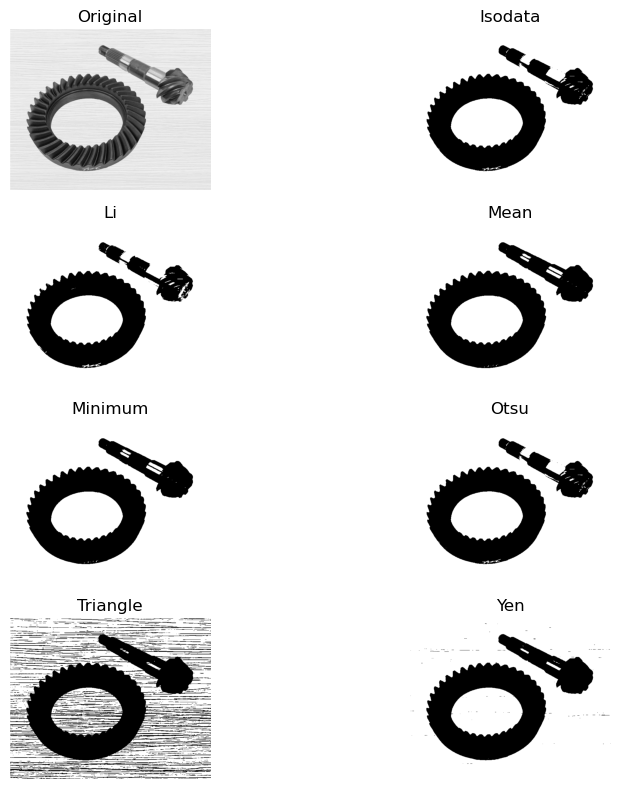

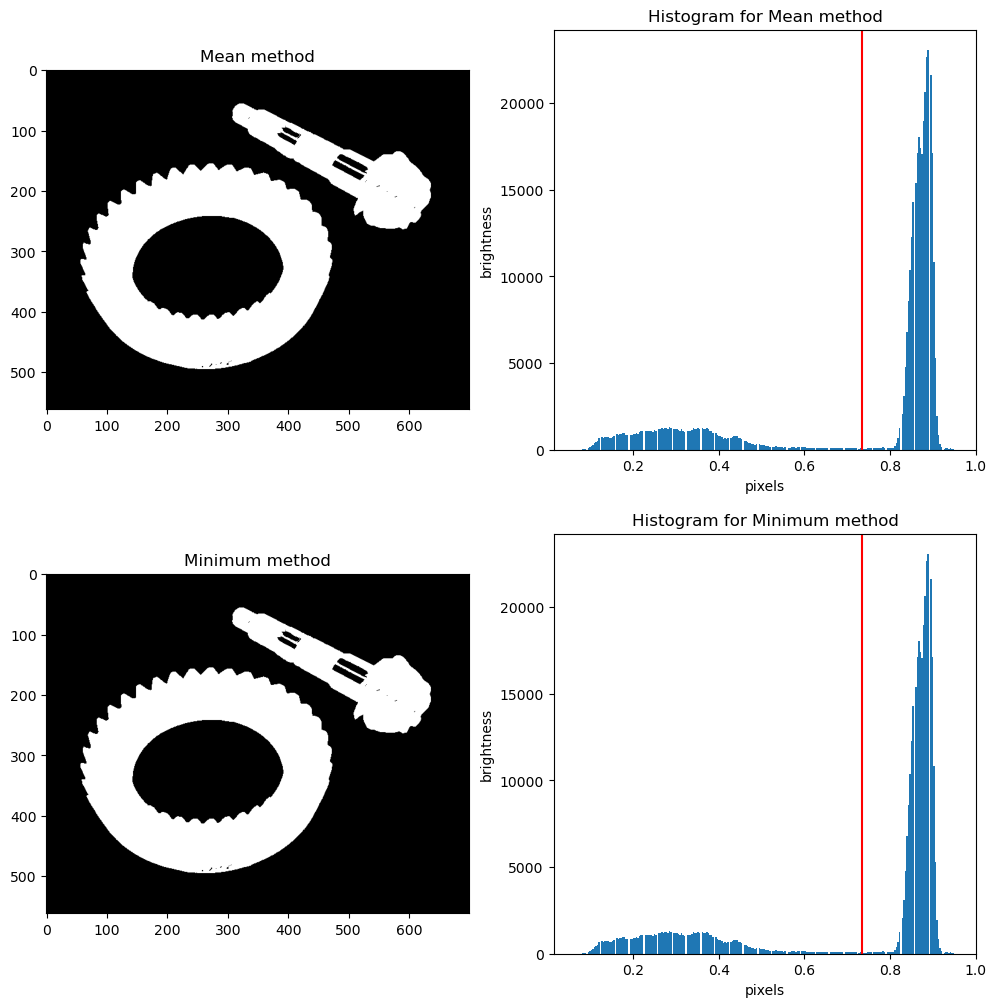

In [2]:
img = io.imread('gears1.png', as_gray=True)

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

# mean, minimum

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))
ax = axes.ravel()

ax[0] = plt.subplot(2, 2, 1)
ax[1] = plt.subplot(2, 2, 2)
ax[2] = plt.subplot(2, 2, 3)
ax[3] = plt.subplot(2, 2, 4)

thresh_mean = threshold_mean(img)
binary_mean = img > thresh_mean

ax[0].imshow(~binary_mean, cmap=plt.cm.gray)
ax[0].set_title('Mean method')

ax[1].hist(img.ravel(), bins=256)
ax[1].set_title('Histogram for Mean method')
ax[1].axvline(thresh_mean, color='r')
ax[1].set_xlabel('pixels')
ax[1].set_ylabel('brightness')

thresh_minimum = threshold_mean(img)
binary_minimum = img > thresh_minimum

ax[2].imshow(~binary_minimum, cmap=plt.cm.gray)
ax[2].set_title('Minimum method')

ax[3].hist(img.ravel(), bins=256)
ax[3].set_title('Histogram for Minimum method')
ax[3].axvline(thresh_minimum, color='r')
ax[3].set_xlabel('pixels')
ax[3].set_ylabel('brightness')

plt.show()

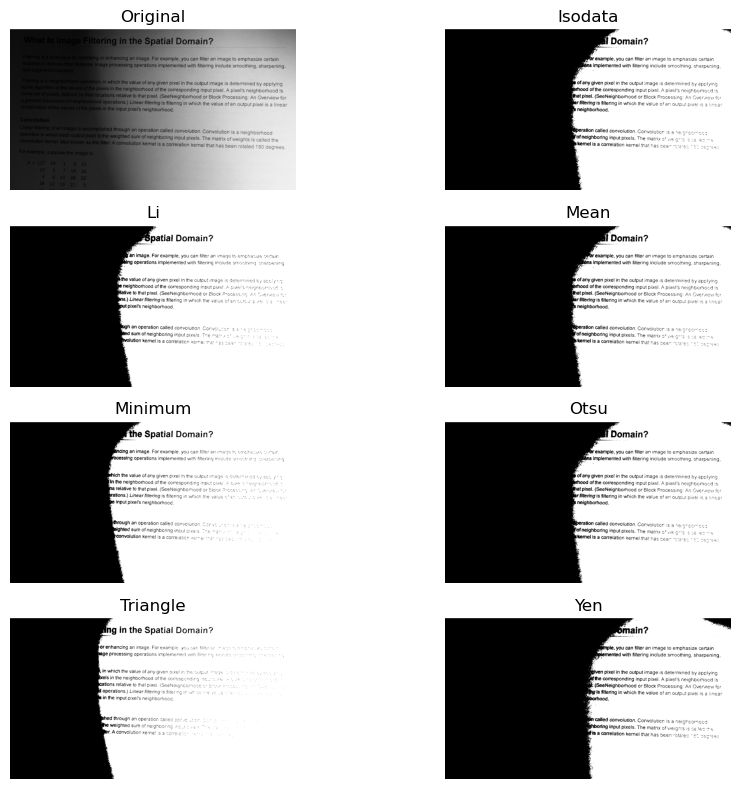

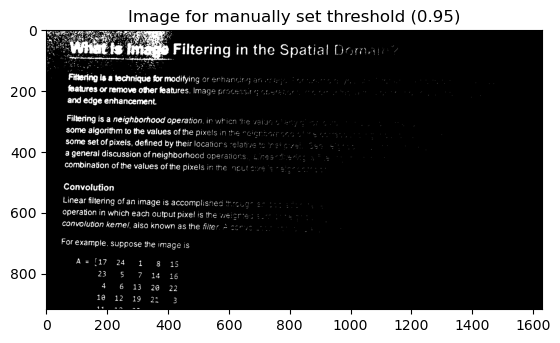

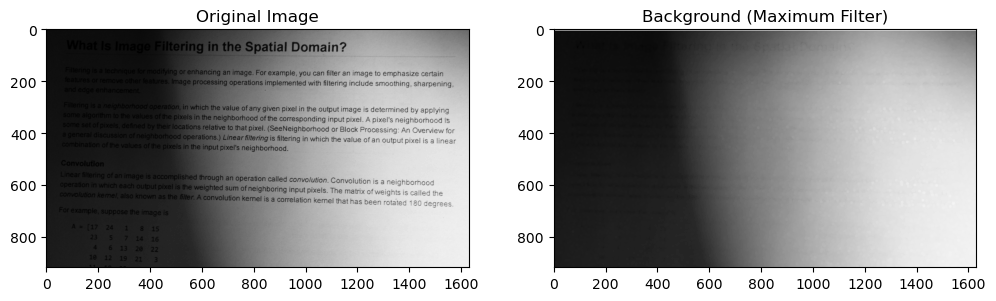

In [3]:
img = io.imread('printed_text.png', as_gray=True)
img_inverted = 1 - img
img_8bit = img_as_ubyte(img)

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

example_thresh = 0.95
binary = img_inverted > example_thresh

plt.imshow(binary, plt.cm.gray)
plt.title('Image for manually set threshold (0.95)')
plt.show()

disk_size = 5
background = filters.rank.maximum(img_8bit, morphology.disk(disk_size))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax = axes.ravel()

ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")

ax[1].imshow(background, cmap='gray')
ax[1].set_title("Background (Maximum Filter)")

plt.show()

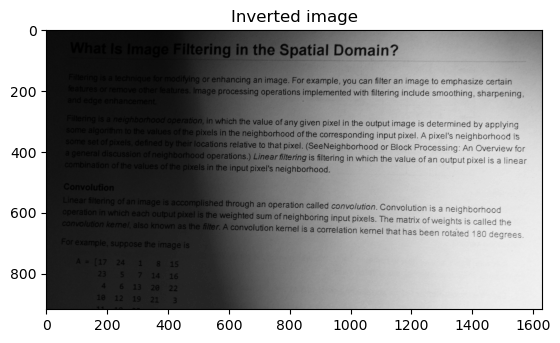

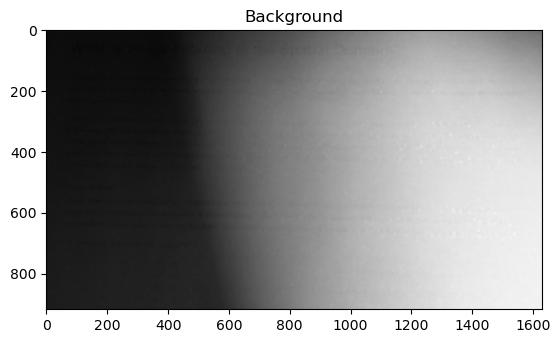

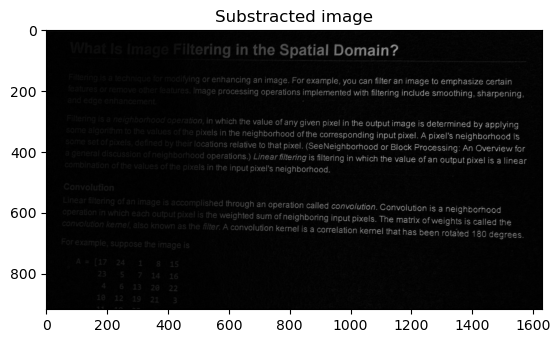

In [4]:
subtracted_image = img_as_ubyte(background) - img_as_ubyte(img)

plt.imshow(img, cmap='gray')
plt.title('Inverted image')
plt.show()

plt.imshow(background, cmap='gray')
plt.title('Background')
plt.show()

plt.imshow(subtracted_image, cmap='gray')
plt.title('Substracted image')
plt.show()

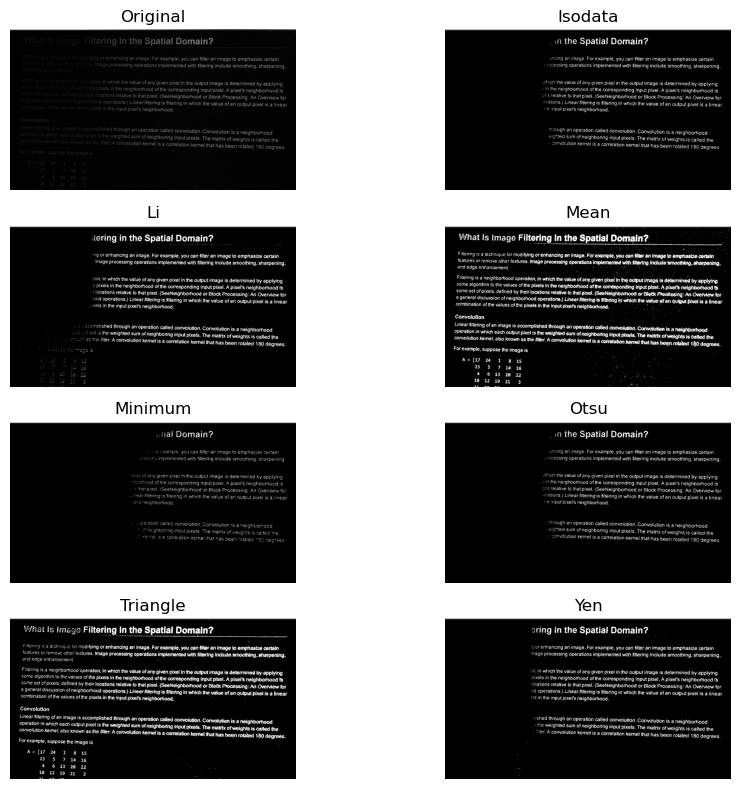

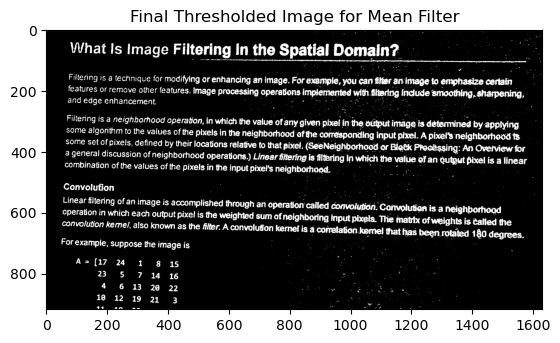

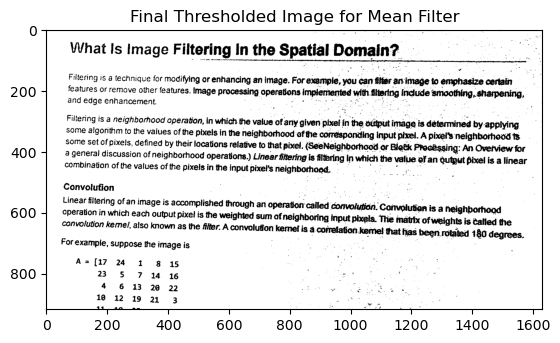

In [16]:
fig, ax = try_all_threshold(subtracted_image, figsize=(10, 8), verbose=False)
plt.show()

thresh_val = threshold_mean(subtracted_image)
binary_result = subtracted_image > thresh_val

plt.imshow(binary_result, cmap='gray')
plt.title("Final Thresholded Image for Mean Filter")
plt.show()

plt.imshow(~binary_result, cmap='gray')
plt.title("Final Thresholded Image for Mean Filter")
plt.show()

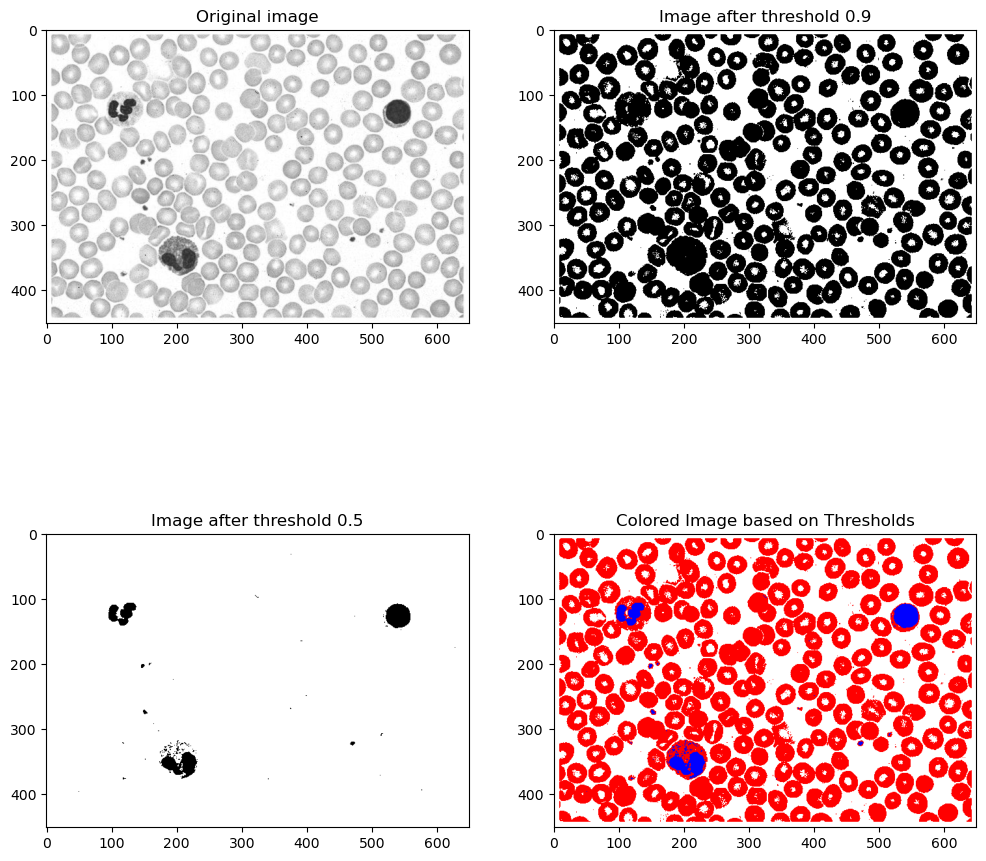

In [6]:
img = io.imread('blood_smear.jpg', as_gray=True)

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))
ax = axes.ravel()

t1 = 0.9
img1 = img > t1

t2 = 0.5
img2 = img > t2

colored_img = np.ones((*img.shape, 3))

colored_img[img < t2] = [0, 0, 1]  # Blue
colored_img[(img > t2) & (img < t1)] = [1, 0, 0]  # Red

ax[0].imshow(img, plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(img1, plt.cm.gray)
ax[1].set_title('Image after threshold 0.9')

ax[2].imshow(img2, plt.cm.gray)
ax[2].set_title('Image after threshold 0.5')

ax[3].imshow(colored_img, plt.cm.gray)
ax[3].set_title('Colored Image based on Thresholds')

plt.show()

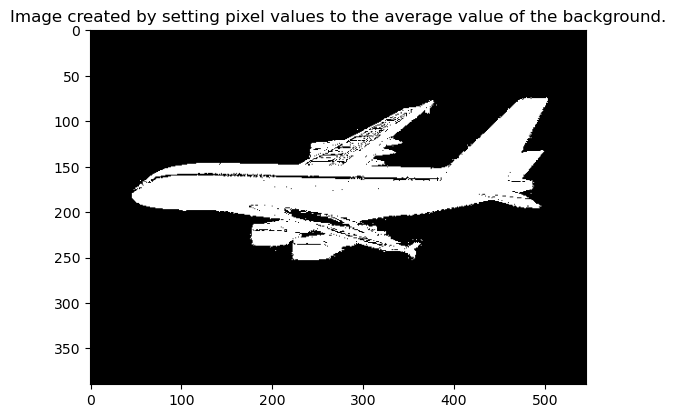

In [20]:
airbus = io.imread('airbus.png', as_gray=False)

niebo = airbus[:75, :600]

avg_r = np.average(niebo[:, :, 0])
avg_g = np.average(niebo[:, :, 1])
avg_b = np.average(niebo[:, :, 2])

# Create the average color vector
avg_color = np.array([avg_r, avg_g, avg_b])

maxDist = 0

for i in range(niebo.shape[0]):
    for j in range(niebo.shape[1]):
        # Get the current pixel color vector (ignore alpha channel if present)
        pixel_color = niebo[i, j, :3]

        # Calculate the distance 
        dist = np.linalg.norm(avg_color - pixel_color)

        if dist > maxDist:
            maxDist = dist


binary_airbus = np.zeros((airbus.shape[0], airbus.shape[1]), dtype=np.int8)

for i in range(airbus.shape[0]):
    for j in range(airbus.shape[1]):
        # Get the current pixel color vector (ignore alpha channel if present)
        pixel_color = airbus[i, j, :3]

        # Calculate the distance 
        dist = np.linalg.norm(avg_color - pixel_color)

        if dist > maxDist:
            binary_airbus[i, j] = 1
        else:
            binary_airbus[i, j] = 0

plt.imshow(binary_airbus, cmap='gray')
plt.title('Image created by setting pixel values to the average value of the background.')
plt.show()